In [1]:
# import packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sb
%matplotlib inline

In [2]:
# read the data
df = pd.read_csv('week3_challenge.csv', index_col = 0)
df.shape

(11993, 289)

In [3]:
# remove columns from the dataframe that have more than 30% of their values missing
nullval = df.loc[:, df.isnull().mean()< 0.3]

In [4]:
nullval.shape

(11993, 271)

In [5]:
# create a new dataframe containing only the numeric columns
numdata = nullval.copy()
numdata = numdata.select_dtypes(include=[np.number]) 
numdata.shape

(11993, 248)

In [6]:
numdata.head()

createdAt_Month  SystemCustomerID  SystemLoanID  next_loan_number  \
0           201812         334043596  302881418623                 1   
1           201809         524284563  302328949395                 4   
2           201810         481582700  302536536368                 2   
3           201812         234330495  302887567434                 1   
4           201901         563455515  303057983993                 2   

     Income  __v  demofeatures_net_income_band  demofeatures_appweek  \
0  200000.0  0.0                      200000.0                   1.0   
1   80000.0  0.0                      100000.0                   1.0   
2   39500.0  0.0                       50000.0                   2.0   
3   50000.0  0.0                       50000.0                   1.0   
4   20000.0  0.0                       75000.0                   3.0   

   demofeatures_age_at_application_yrs  demofeatures_num_children  \
0                                 28.0                        0.0   
1                                 33.0                        0.0   
2                                 26.0                        0.0   
3                                 36.0                        1.0   
4                                 28.0                        3.0   

        ...         callFeatures_vol_calls_1_mnth_out  \
0       ...                                     655.0   
1       ...                                    2923.0   
2       ...                                    1115.0   
3       ...                                      58.0   
4       ...                                    1474.0   

   callFeatures_vol_calls_2_mnth_out  callFeatures_vol_calls_3_mnth_out  \
0                                0.0                                0.0   
1                                0.0                                0.0   
2                                0.0                                0.0   
3                               50.0                                0.0   
4                                0.0                                0.0   

   callFeatures_dur_calls_out  callFeatures_dur_calls_contacts_out  \
0                     48872.0                             0.985554   
1                     65335.0                             0.956868   
2                     98762.0                             0.000000   
3                      1530.0                             0.762092   
4                     29949.0                             0.937828   

   callFeatures_ratio_contacts_out  callFeatures_no_distinct_call_numbers_out  \
0                         0.929771                                      139.0   
1                         0.917550                                      327.0   
2                         0.000000                                      139.0   
3                         0.777778                                       46.0   
4                         0.938942                                      114.0   

   callFeatures_no_calls_over_zero_secs_out  callFeatures_no_calls_out  \
0                                     287.0                      655.0   
1                                    1114.0                     2923.0   
2                                     583.0                     1115.0   
3                                      38.0                      108.0   
4                                     549.0                     1474.0   

   predictedIncome  
0    105872.674499  
1     34421.220891  
2     14447.944277  
3     52952.581832  
4     31577.275467  

[5 rows x 248 columns]

In [7]:
# replace null values in the numeric dataframe with 0.
numdata.fillna(0, inplace=True)

In [8]:
# scale numeric dataframe
scalednumdata = pd.DataFrame(StandardScaler().fit_transform(numdata), columns=numdata.columns, index=numdata.index)

In [9]:
scalednumdata.head()

createdAt_Month  SystemCustomerID  SystemLoanID  next_loan_number  \
0        -0.552327         -0.542589      0.488975         -0.389585   
1        -0.626734          0.114605     -1.045259          2.823083   
2        -0.601932         -0.032910     -0.468779          0.681305   
3        -0.552327         -0.887051      0.506051         -0.389585   
4         1.655065          0.249922      0.979306          0.681305   

     Income  __v  demofeatures_net_income_band  demofeatures_appweek  \
0  2.488673  0.0                      0.964747             -1.243848   
1  0.541326  0.0                      0.082888             -1.243848   
2 -0.115904  0.0                     -0.358041             -0.386424   
3  0.054489  0.0                     -0.358041             -1.243848   
4 -0.432348  0.0                     -0.137577              0.471001   

   demofeatures_age_at_application_yrs  demofeatures_num_children  \
0                            -0.222474                  -0.648491   
1                             0.443094                  -0.648491   
2                            -0.488701                  -0.648491   
3                             0.842434                   0.170522   
4                            -0.222474                   1.808549   

        ...         callFeatures_vol_calls_1_mnth_out  \
0       ...                                  0.016726   
1       ...                                  1.841329   
2       ...                                  0.386796   
3       ...                                 -0.463560   
4       ...                                  0.675611   

   callFeatures_vol_calls_2_mnth_out  callFeatures_vol_calls_3_mnth_out  \
0                          -0.218086                          -0.113863   
1                          -0.218086                          -0.113863   
2                          -0.218086                          -0.113863   
3                           0.348488                          -0.113863   
4                          -0.218086                          -0.113863   

   callFeatures_dur_calls_out  callFeatures_dur_calls_contacts_out  \
0                    0.075120                             0.792418   
1                    0.127209                             0.709694   
2                    0.232974                            -2.049741   
3                   -0.074673                             0.147992   
4                    0.015246                             0.654783   

   callFeatures_ratio_contacts_out  callFeatures_no_distinct_call_numbers_out  \
0                         0.703710                                   0.543044   
1                         0.667245                                   2.471878   
2                        -2.070640                                   0.543044   
3                         0.250177                                  -0.411114   
4                         0.731075                                   0.286550   

   callFeatures_no_calls_over_zero_secs_out  callFeatures_no_calls_out  \
0                                  0.004773                  -0.006009   
1                                  1.408808                   1.776958   
2                                  0.507306                   0.355615   
3                                 -0.417965                  -0.436028   
4                                  0.449582                   0.637840   

   predictedIncome  
0         2.802797  
1        -0.149962  
2        -0.975365  
3         0.615854  
4        -0.267489  

[5 rows x 248 columns]

In [10]:
# create pca and fit the data to the model
pca = PCA(n_components = 5)
pcatransform = pca.fit_transform(scalednumdata)

In [11]:
# create dataframe containing principal components
principalDf = pd.DataFrame(data = pcatransform, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5'])

# display principal components
principalDf.head()

pc1       pc2       pc3       pc4       pc5
0   4.220974 -2.270272  0.756789 -1.597210  4.229321
1  13.464907 -3.685776 -2.142138 -0.889165 -0.218567
2   5.900341 -2.368060  0.093386  0.484786  0.241568
3  -1.884293  1.370641 -0.220785  3.304324  0.300005
4   2.631881  1.782549  0.575779 -2.894538 -0.848399

In [12]:
print(pca.explained_variance_ratio_)

[0.3510669  0.09311398 0.03786533 0.03341305 0.02734518]


In [13]:
# total variance
pca.explained_variance_ratio_.sum()

0.5428044401153285

In [40]:
# declare a Kmeans instance with 3 classes
kmeans = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 300, n_init= 10, random_state= 0)
y_pred = kmeans.fit_predict(pcatransform)
y_pred

array([0, 2, 0, ..., 0, 0, 0])

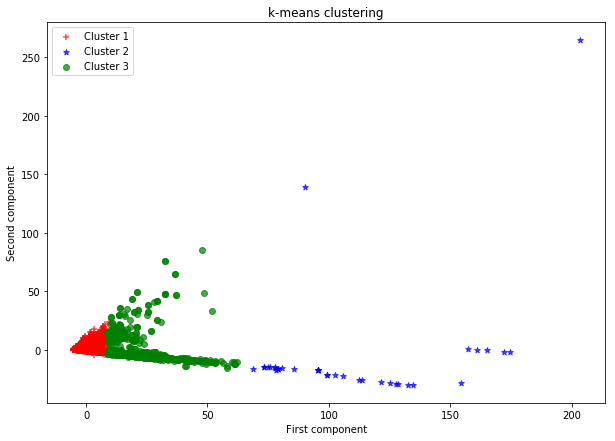

In [50]:
# plot the clusters
plt.subplots(1,1, figsize=(10,7))
plt.title('k-means clustering')
plt.scatter(pcatransform[y_pred == 0, 0], pcatransform[y_pred == 0, 1], alpha =.7, color = 'r',  label='Cluster 1' , marker = '+')
plt.scatter(pcatransform[y_pred == 1, 0], pcatransform[y_pred == 1, 1], alpha =.7, color = 'b', label='Cluster 2', marker = '*')
plt.scatter(pcatransform[y_pred == 2, 0], pcatransform[y_pred == 2, 1], alpha =.7, color = 'g', label='Cluster 3', marker = 'o')

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('First component')
plt.ylabel('Second component');

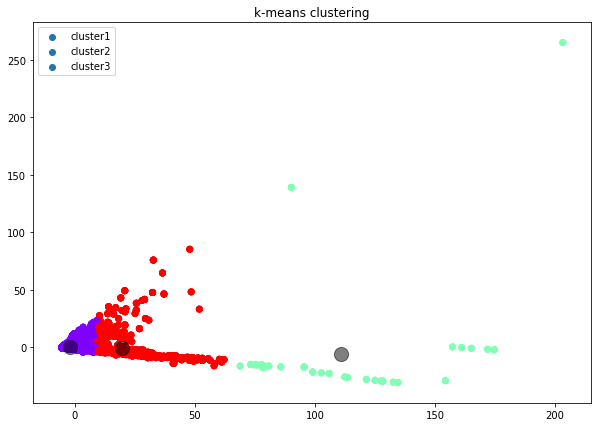

In [51]:
plt.figure(figsize=(10,7))
plt.scatter(pcatransform[:,0],pcatransform[:,1], c=kmeans.labels_, cmap='rainbow', label ='cluster1')
plt.scatter(pcatransform[:,0],pcatransform[:,1], c=kmeans.labels_, cmap='rainbow',label ='cluster2')
plt.scatter(pcatransform[:,0],pcatransform[:,1], c=kmeans.labels_, cmap='rainbow',label ='cluster3')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.title('k-means clustering')
plt.legend()
plt.show()

In [17]:
# create dataframe
reconnectcluster = pd.DataFrame()
reconnectcluster['cluster'] = kmeans.labels_
reconnectcluster.head()

cluster
0        0
1        2
2        0
3        0
4        0

In [18]:
print(kmeans.labels_)

[0 2 0 ... 0 0 0]


In [19]:
# reconnect the final clusters of each observation to the original dataframe
final = pd.concat([numdata, reconnectcluster], axis = 1)
final.head()

createdAt_Month  SystemCustomerID  SystemLoanID  next_loan_number  \
0           201812         334043596  302881418623                 1   
1           201809         524284563  302328949395                 4   
2           201810         481582700  302536536368                 2   
3           201812         234330495  302887567434                 1   
4           201901         563455515  303057983993                 2   

     Income  __v  demofeatures_net_income_band  demofeatures_appweek  \
0  200000.0  0.0                      200000.0                   1.0   
1   80000.0  0.0                      100000.0                   1.0   
2   39500.0  0.0                       50000.0                   2.0   
3   50000.0  0.0                       50000.0                   1.0   
4   20000.0  0.0                       75000.0                   3.0   

   demofeatures_age_at_application_yrs  demofeatures_num_children   ...     \
0                                 28.0                        0.0   ...      
1                                 33.0                        0.0   ...      
2                                 26.0                        0.0   ...      
3                                 36.0                        1.0   ...      
4                                 28.0                        3.0   ...      

   callFeatures_vol_calls_2_mnth_out  callFeatures_vol_calls_3_mnth_out  \
0                                0.0                                0.0   
1                                0.0                                0.0   
2                                0.0                                0.0   
3                               50.0                                0.0   
4                                0.0                                0.0   

   callFeatures_dur_calls_out  callFeatures_dur_calls_contacts_out  \
0                     48872.0                             0.985554   
1                     65335.0                             0.956868   
2                     98762.0                             0.000000   
3                      1530.0                             0.762092   
4                     29949.0                             0.937828   

   callFeatures_ratio_contacts_out  callFeatures_no_distinct_call_numbers_out  \
0                         0.929771                                      139.0   
1                         0.917550                                      327.0   
2                         0.000000                                      139.0   
3                         0.777778                                       46.0   
4                         0.938942                                      114.0   

   callFeatures_no_calls_over_zero_secs_out  callFeatures_no_calls_out  \
0                                     287.0                      655.0   
1                                    1114.0                     2923.0   
2                                     583.0                     1115.0   
3                                      38.0                      108.0   
4                                     549.0                     1474.0   

   predictedIncome  cluster  
0    105872.674499        0  
1     34421.220891        2  
2     14447.944277        0  
3     52952.581832        0  
4     31577.275467        0  

[5 rows x 249 columns]

In [25]:
final.groupby(['cluster']).mean()

createdAt_Month  SystemCustomerID  SystemLoanID  next_loan_number  \
cluster                                                                      
0          201834.753494      4.907692e+08  3.027137e+11          1.257957   
1          201822.583333      5.074861e+08  3.026502e+11          3.555556   
2          201828.554273      4.947852e+08  3.026011e+11          2.628176   

               Income  __v  demofeatures_net_income_band  \
cluster                                                    
0        45875.857098  0.0                  89448.652060   
1        84844.563889  0.0                 125694.444444   
2        54869.886513  0.0                 103897.228637   

         demofeatures_appweek  demofeatures_age_at_application_yrs  \
cluster                                                              
0                    2.438464                            29.494545   
1                    2.805556                            31.500000   
2                    2.592379                            31.859122   

         demofeatures_num_children       ...         \
cluster                                  ...          
0                         0.778199       ...          
1                         1.250000       ...          
2                         0.946882       ...          

         callFeatures_vol_calls_1_mnth_out  callFeatures_vol_calls_2_mnth_out  \
cluster                                                                         
0                               393.169958                          14.398702   
1                             14308.472222                         176.055556   
2                              3152.790993                          74.808314   

         callFeatures_vol_calls_3_mnth_out  callFeatures_dur_calls_out  \
cluster                                                                  
0                                 2.712740                16491.437832   
1                               119.222222               540491.611111   
2                                16.327945               114347.796767   

         callFeatures_dur_calls_contacts_out  callFeatures_ratio_contacts_out  \
cluster                                                                         
0                                   0.711919                         0.695088   
1                                   0.832131                         0.787635   
2                                   0.691060                         0.675290   

         callFeatures_no_distinct_call_numbers_out  \
cluster                                              
0                                        67.575512   
1                                       936.555556   
2                                       287.584296   

         callFeatures_no_calls_over_zero_secs_out  callFeatures_no_calls_out  \
cluster                                                                        
0                                      173.428726                 412.801461   
1                                     7127.638889               14964.000000   
2                                     1418.222864                3267.906467   

         predictedIncome  
cluster                   
0           37588.262903  
1           57441.201649  
2           43157.858317  

[3 rows x 248 columns]

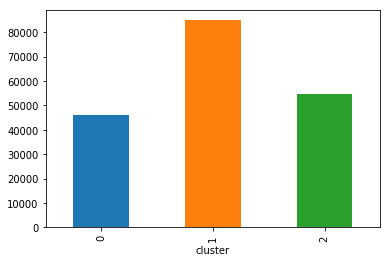

In [29]:
final.groupby('cluster')['Income'].mean().plot.bar();

In [22]:
# plot based on cluster
#for i in range(len(kmeans.labels_)):
 #   if kmeans.labels_[i] == 0:
  #      c1 = plt.scatter(pcatransform[i, 0], pcatransform[i, 1], c='r', marker='+')
   # elif kmeans.labels_[i] == 1:
    #    c2 = plt.scatter(pcatransform[i, 0], pcatransform[i, 1], c='g', marker='o')
    # elif kmeans.labels_[i] == 2:
      #  c3 = plt.scatter(pcatransform[i, 0], pcatransform[i, 1], c='b', marker='*')
        
# plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster3'])
#plt.title('There are 3 cluster in our data but we can only plot in 2 dimensions')
#plt.show()